In [ ]:
!pip install pandas


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv('Churn_Modelling.csv')


Saving Churn_Modelling.csv to Churn_Modelling (2).csv


In [ ]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [ ]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7988 - loss: 0.5138 - val_accuracy: 0.7969 - val_loss: 0.5103
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7949 - loss: 0.5100 - val_accuracy: 0.7969 - val_loss: 0.5046
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7925 - loss: 0.5098 - val_accuracy: 0.7969 - val_loss: 0.5006
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7875 - loss: 0.5144 - val_accuracy: 0.7969 - val_loss: 0.4987
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7909 - loss: 0.5071 - val_accuracy: 0.7969 - val_loss: 0.4974
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8012 - loss: 0.4933 - val_accuracy: 0.7969 - val_loss: 0.4966
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7932 - loss: 0.5029 - val_accuracy: 0.7969 - val_loss: 0.4960
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7915 - loss: 0.5052 - val_accu

In [ ]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_pred

array([[0.24697812],
       [0.24697812],
       [0.22892213],
       ...,
       [0.23117957],
       [0.25007832],
       [0.24697812]], dtype=float32)

In [ ]:
model.layers[0].get_weights()

[array([[-0.04695032, -0.32605436,  0.50489724,  0.45892718,  0.6037636 ,
         -0.42501253,  0.21210419,  0.5370696 ,  0.30890277,  0.5407891 ,
         -0.52162844],
        [-0.08832131, -0.2586407 ,  0.06046453,  0.17193474, -0.331844  ,
         -0.05399576,  0.45792007, -0.22462359,  0.3188523 ,  0.06151713,
         -0.4460764 ],
        [-0.45958716, -0.37180868, -0.01133187, -0.23223038, -0.31342074,
         -0.37627283,  0.24165979,  0.16042012, -0.17032404, -0.05997099,
          0.34018022],
        [ 0.14454764,  0.03213745, -0.12416183, -0.29151934, -0.27683747,
         -0.26699808, -0.00753487, -0.3378667 , -0.22136316,  0.41336814,
          0.5108052 ],
        [-0.43454298,  0.4336127 ,  0.4548296 , -0.46655077, -0.24260214,
         -0.27325547,  0.04861066, -0.04477241,  0.45386663, -0.31727713,
         -0.20263672],
        [ 0.24878067, -0.45273617, -0.32984373,  0.4419774 ,  0.18501583,
          0.4766041 ,  0.20313342, -0.28661564, -0.42956895, -0.3039528

In [ ]:
model.layers[1].get_weights()


[array([[ 0.19026035,  0.02640688, -0.34300902, -0.22199255, -0.41293275,
          0.45357406,  0.08198507,  0.22696605,  0.20689467, -0.2797476 ,
          0.3263661 ],
        [-0.47501412, -0.7432204 , -0.3917254 ,  0.6868751 , -0.51917404,
          0.6902762 , -0.6148007 ,  0.02374195,  0.12957452,  0.33985877,
         -0.07498554],
        [ 0.49675596,  0.10338358, -0.34636667, -0.39607587,  0.43221828,
         -0.11103077, -0.3030786 ,  0.3234799 ,  0.2450877 , -0.22059856,
         -0.29510945],
        [-0.06756461,  0.10121909, -0.27813113, -0.26079676, -0.13392378,
          0.22076456,  0.12148724,  0.19448963, -0.08319151, -0.5785546 ,
         -0.44978496],
        [-0.20569247,  0.22635426, -0.16082749, -0.18451934,  0.3327635 ,
         -0.03042216,  0.5402945 , -0.3314313 ,  0.2345321 , -0.5995595 ,
         -0.08021073],
        [ 0.16150945, -0.16701353, -0.02617463, -0.39026526, -0.0642432 ,
          0.2694    , -0.28477353,  0.4829343 ,  0.4789837 , -0.0368440

In [ ]:
model.layers[2].get_weights()


[array([[-0.3019684 ],
        [-0.21506792],
        [-0.5896839 ],
        [ 0.15861285],
        [-0.18324089],
        [ 0.47416908],
        [-0.89026386],
        [-0.7722219 ],
        [-0.66317046],
        [ 0.3525711 ],
        [ 0.11149709]], dtype=float32),
 array([-0.1860147], dtype=float32)]

In [ ]:
y_pr=np.where(y_pred>0.6,1,0)

In [ ]:
y_pr


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pr)

0.7975

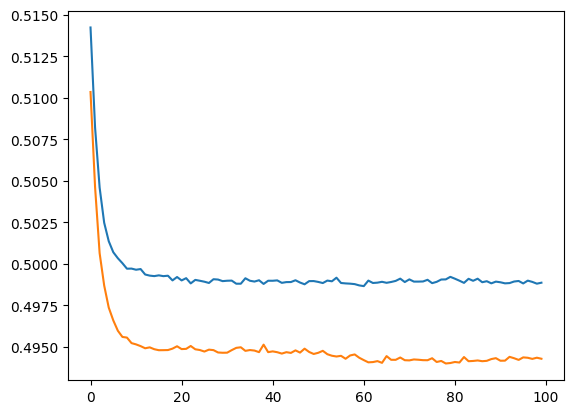

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


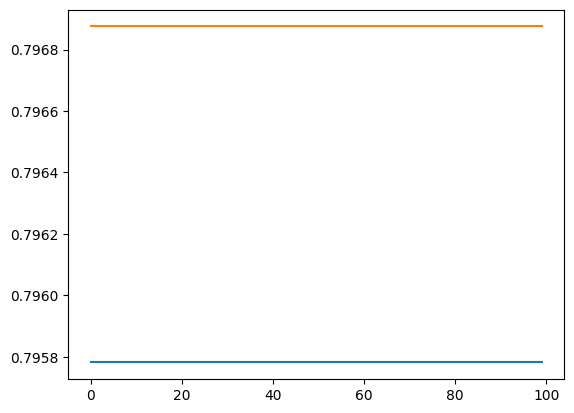

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])